In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [23]:
scaler=StandardScaler()

In [24]:
df = pd.read_csv("/home/hala/Downloads/train.csv")

In [25]:
#Handling Embarked feature by replace the missing values with the most common value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [26]:
cabin_only = df[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)

In [27]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck
1,C85,True,C
3,C123,True,C
6,E46,True,E
10,G6,True,G
11,C103,True,C
...,...,...,...
871,D35,True,D
872,B51 B53 B55,True,B
879,C50,True,C
887,B42,True,B


In [28]:
cabin_only["Deck"] = cabin_only["Deck"].fillna("N")
df['Deck']=cabin_only["Deck"]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,N
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [29]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

df.Deck.replace(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [1, 2, 3,4,5,6,7,8,9], inplace=True)



In [30]:
#Third method
#use sklearn to applay the Linear Regression to predict the missing values of the age
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:7]
target=data_without_null.iloc[:,7]
lin.fit(train,target)
test=data_with_null.iloc[:,:7]
pridect_Age=pd.DataFrame(lin.predict(test))



data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

df['pridect_Age']=data_with_null.Age.astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,1,23
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26


In [31]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df_filled=pd.DataFrame(imputer.fit_transform(df[['Survived' ,'Pclass','SibSp','Parch','Fare','Deck','Embarked','Age']]),)
df['KNN_pridect_Age']=df_filled[7].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age,KNN_pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38,38
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35,35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27,27
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19,19
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,1,1,23,33
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26,26


In [32]:
#Second method
#replacing NaN with the mean value
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [33]:
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
df['Title'] = df['Title'].map(title_reduction)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [34]:
for title, age in df.groupby('Title')['Age'].median().iteritems():
    print(title, age)
    df.loc[(df['Title']==title) & (df['Age'].isnull()), 'Age'] = age

df.isnull().sum()

Dr 46.5
Master 3.5
Miss 21.5
Mr 30.0
Mrs 35.0
Rev 46.5


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Deck                 0
pridect_Age          0
KNN_pridect_Age      0
Title                0
dtype: int64

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age,KNN_pridect_Age,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22,22,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38,38,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26,26,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35,35,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35,35,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27,27,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19,19,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,1,1,23,33,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26,26,Mr


In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,pridect_Age,KNN_pridect_Age,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,22,22,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,38,38,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,26,26,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,35,35,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,35,35,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,1,27,27,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,1,7,19,19,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,1,1,23,33,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2,2,26,26,Mr


In [39]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,pridect_Age,KNN_pridect_Age
0,1,0,3,1,22.0,1,0,7.2500,1,1,22,22
1,2,1,1,0,38.0,1,0,71.2833,2,2,38,38
2,3,1,3,0,26.0,0,0,7.9250,1,1,26,26
3,4,1,1,0,35.0,1,0,53.1000,1,2,35,35
4,5,0,3,1,35.0,0,0,8.0500,1,1,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1,1,27,27
887,888,1,1,0,19.0,0,0,30.0000,1,7,19,19
888,889,0,3,0,21.5,1,2,23.4500,1,1,23,33
889,890,1,1,1,26.0,0,0,30.0000,2,2,26,26


In [38]:
df.drop(['Name','Ticket','Cabin','Title'] ,axis=1 , inplace=True)

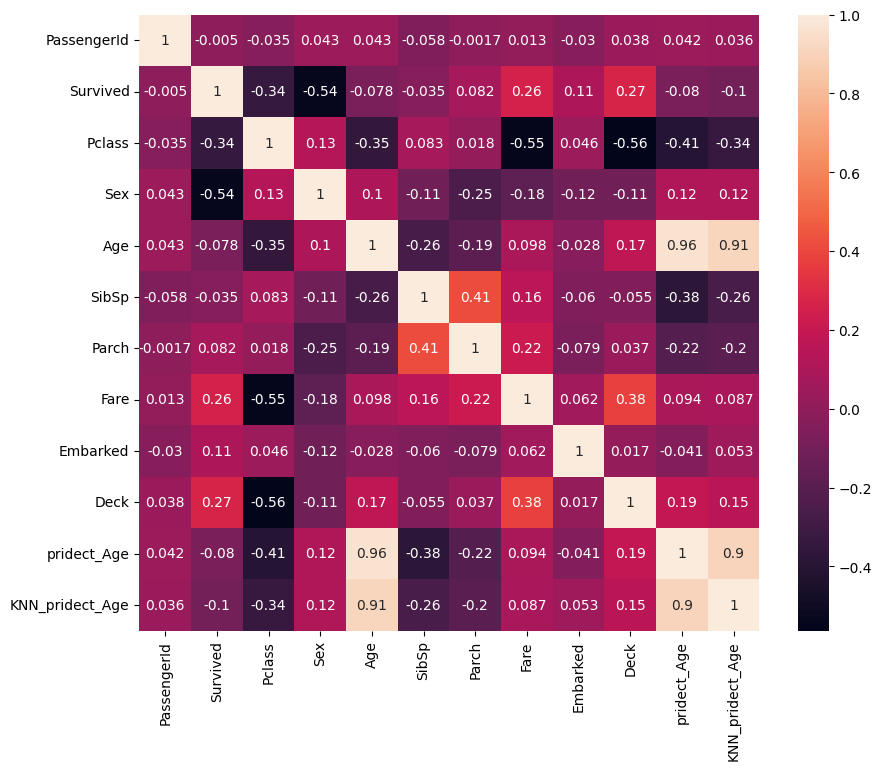

In [40]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [ ]:
#First : Linear * mean

In [41]:
#scaled=scaler.fit_transform(df.drop(['Survived','pridect_Age' ,'KNN_pridect_Age'],axis=1))

#scaled_features=pd.DataFrame(scaled, columns=['Pclass', 'Sex', 'Age_mean', 'SibSp', 'Parch','Fare','Embarked' ,'Deck'])
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


In [42]:
LR=LogisticRegression().fit(X_train,y_train)

In [43]:
y_predict=LR.predict(X_test)

In [44]:
con_mat=confusion_matrix(y_test,y_predict)

In [45]:
con_mat=pd.DataFrame(con_mat,columns=['predicted No','predicted Yes'],index=['actual No','actual Yes'])

In [46]:
print(con_mat)

            predicted No  predicted Yes
actual No            110             18
actual Yes            24             71


In [47]:
score=accuracy_score(y_predict,y_test)

In [48]:
print(score)

0.8116591928251121


In [ ]:
##Second Linear* Linear

In [50]:
#scaled=scaler.fit_transform(df.drop(['Survived','Age_mean' ,'KNN_pridect_Age'],axis=1))

#scaled_features=pd.DataFrame(scaled, columns=['PassengerId', 'Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck'])
X=df[['Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [51]:
LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
con_mat=confusion_matrix(y_test,y_predict)
con_mat=pd.DataFrame(con_mat,columns=['predicted No','predicted Yes'],index=['actual No','actual Yes'])
score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            120             19
actual Yes            22             62
0.8161434977578476


In [ ]:
##Third : Linear * KNN

In [64]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
LR=LogisticRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
con_mat=confusion_matrix(y_test,y_predict)
con_mat=pd.DataFrame(con_mat,columns=['predicted No','predicted Yes'],index=['actual No','actual Yes'])
score=accuracy_score(y_predict,y_test)
print(con_mat)
print(score)

            predicted No  predicted Yes
actual No            119             15
actual Yes            21             68
0.8385650224215246


In [54]:
##KNN * linear

In [67]:

# importing libraries

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate



In [68]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)



In [73]:
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))
    




 CV accuracy for k=1 is 65

 CV accuracy for k=2 is 71

 CV accuracy for k=3 is 73

 CV accuracy for k=4 is 71

 CV accuracy for k=5 is 71

 CV accuracy for k=6 is 72

 CV accuracy for k=7 is 70

 CV accuracy for k=8 is 69

 CV accuracy for k=9 is 69

 CV accuracy for k=10 is 70

 CV accuracy for k=11 is 69

 CV accuracy for k=12 is 71

 CV accuracy for k=13 is 69

 CV accuracy for k=14 is 70

 CV accuracy for k=15 is 69

 CV accuracy for k=16 is 69

 CV accuracy for k=17 is 70

 CV accuracy for k=18 is 69

 CV accuracy for k=19 is 69


In [74]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)


2


In [75]:
X=df[['Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)




In [76]:
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))



 CV accuracy for k=1 is 69

 CV accuracy for k=2 is 71

 CV accuracy for k=3 is 72

 CV accuracy for k=4 is 75

 CV accuracy for k=5 is 71

 CV accuracy for k=6 is 72

 CV accuracy for k=7 is 72

 CV accuracy for k=8 is 70

 CV accuracy for k=9 is 72

 CV accuracy for k=10 is 71

 CV accuracy for k=11 is 72

 CV accuracy for k=12 is 73

 CV accuracy for k=13 is 73

 CV accuracy for k=14 is 72

 CV accuracy for k=15 is 72

 CV accuracy for k=16 is 72

 CV accuracy for k=17 is 73

 CV accuracy for k=18 is 73

 CV accuracy for k=19 is 74


In [77]:


optimal_k = final_scores.index(max(final_scores))
print(optimal_k)



3


In [78]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)




In [79]:
final_scores = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 70

 CV accuracy for k=2 is 70

 CV accuracy for k=3 is 73

 CV accuracy for k=4 is 74

 CV accuracy for k=5 is 73

 CV accuracy for k=6 is 71

 CV accuracy for k=7 is 74

 CV accuracy for k=8 is 74

 CV accuracy for k=9 is 75

 CV accuracy for k=10 is 77

 CV accuracy for k=11 is 76

 CV accuracy for k=12 is 77

 CV accuracy for k=13 is 77

 CV accuracy for k=14 is 76

 CV accuracy for k=15 is 75

 CV accuracy for k=16 is 75

 CV accuracy for k=17 is 75

 CV accuracy for k=18 is 76

 CV accuracy for k=19 is 75


In [ ]:
##/linear

In [80]:
X=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)



In [81]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



In [82]:


y_pred= model.predict(X_test)
model.decision_function(X_test)



array([-2.57499217,  4.23291478,  1.22916157, -1.79040225, -3.41508711,
       -2.02121977, -3.2913496 , -1.62390715,  0.34257259,  1.35578819,
       -2.78857718, -2.78937144,  3.17442337, -3.02907818, -0.98288357,
       -3.60056334,  1.2310839 , -2.7431644 , -0.60269634,  1.08298441,
        1.38584169, -1.36546206, -2.44219958, -2.44669058, -2.78857718,
        1.47928704, -2.58353475, -2.51257709, -2.79064915, -2.78931388,
        3.52777956, -1.32334981,  2.75723766, -3.20407557,  1.76614815,
       -3.52463014,  0.8833096 ,  1.23154434,  3.66799592, -2.51257709,
        2.23703684, -2.58983895, -2.24848092, -2.75112998, -2.47977915,
        2.8911166 ,  1.52674091,  0.3106882 , -0.72320819,  1.40666521,
        0.72877191, -2.59523838, -2.55701798, -2.63464054,  4.06186245,
       -3.7744025 ,  1.39851747, -3.1788134 ,  2.39020395, -0.42555633,
       -2.32550868,  1.29627258, -1.1038813 , -3.48449025,  1.0685156 ,
        2.99582807,  2.97690718, -2.97320873,  1.29894069, -2.28

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[114  26]
 [ 23  60]]


In [86]:
score=accuracy_score(y_predict,y_test)

In [87]:
score

0.5067264573991032

In [88]:
X=df[['Pclass', 'Sex', 'pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
print(score)

[[127  12]
 [ 25  59]]
0.5291479820627802


In [89]:
X=df[['Pclass', 'Sex', 'KNN_pridect_Age', 'SibSp', 'Parch','Fare','Embarked' ,'Deck']]
y=df['Survived']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
res = model.fit(X_train, y_train).transform(X_train)



y_pred= model.predict(X_test)
model.decision_function(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
score=accuracy_score(y_predict,y_test)
print(score)

[[119  16]
 [ 27  61]]
0.49327354260089684
